In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

x = np.array(([3,5],[5,1],[10,2]),dtype=float)
y = np.array(([75],[82],[93]),dtype=float)
x = x/np.amax(x,axis=0)
y = y/100

class Neural_Network(object):
    def __init__(self):
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self,x):
        self.z2 = np.dot(x,self.W1)
        self.a2 = self.ReLU(self.z2)
        self.z3 = np.dot(self.a2,self.W2)
        yHat = self.ReLU(self.z3)
        return yHat
    
    def ReLU(self, z):
        return np.maximum(0,z)
    
    def ReLUPrime(self,z):
        devReLU = np.zeros(np.shape(z))
        devReLU[z>0]=1
        return devReLU
    
    def costFunction(self, x, y):
        self.yHat = self.forward(x)
        J = 0.5*sum((y-self.yHat)**2)
        return J
    
    def costFunctionPrime(self, x,y):
        self.yHat = self.forward(x)
        delta3 = np.multiply(-(y-self.yHat),self.ReLUPrime(self.z3))
        dJdW2 = np.dot(self.a2.T,delta3)
        delta2 = np.dot(delta3,self.W2.T)*self.ReLUPrime(self.z2)
        dJdW1 = np.dot(x.T,delta2)
        return dJdW1, dJdW2
    
    def getParams(self):
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, x, y):
        dJdW1, dJdW2 = self.costFunctionPrime(x, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))
    
def computeNumericalGradient(N, x, y):
        paramsInitial = N.getParams()
        numgrad = np.zeros(paramsInitial.shape)
        perturb = np.zeros(paramsInitial.shape)
        e = 1e-4
        for p in range(len(paramsInitial)):
            perturb[p] = e
            N.setParams(paramsInitial + perturb)
            loss2 = N.costFunction(x, y)
            N.setParams(paramsInitial - perturb)
            loss1 = N.costFunction(x, y)
            numgrad[p] = (loss2 - loss1) / (2*e)
            perturb[p] = 0
        N.setParams(paramsInitial)

        return numgrad

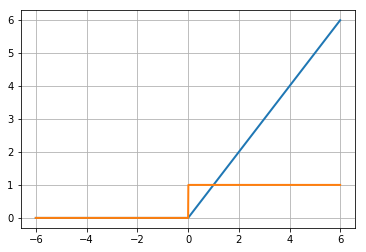

In [35]:
def ReLU(z):
    return np.maximum(0,z)
def ReLUPrime(z):
    devReLU = np.zeros(np.shape(z))
    devReLU[z>0]=1
    return devReLU
testInput = np.arange(-6,6,0.01)
plt.plot(testInput, ReLU(testInput), linewidth= 2)
plt.plot(testInput, ReLUPrime(testInput), linewidth= 2)
plt.grid(1)
plt.show()

In [36]:
NN = Neural_Network()

In [37]:
numgrad = computeNumericalGradient(NN, x, y)
numgrad


array([-0.09348645,  0.        ,  0.        , -0.02707867,  0.        ,
        0.        , -0.28729406,  0.        ,  0.        ])

In [38]:
grad = NN.computeGradients(x,y)
grad

array([-0.09348645,  0.        ,  0.        , -0.02707867,  0.        ,
        0.        , -0.28729406,  0.        ,  0.        ])

In [39]:
class trainer(object):
    def __init__(self, N):
        self.N = N
        
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.x, self.y))   
        
    def costFunctionWrapper(self, params, x, y):
        self.N.setParams(params)
        cost = self.N.costFunction(x, y)
        grad = self.N.computeGradients(x,y)
        
        return cost, grad
        
    def train(self, x, y):
        self.x = x
        self.y = y
        self.J = []
        params0 = self.N.getParams()
        options = {'maxiter': 200, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(x, y), options=options, callback=self.callbackF)
        self.N.setParams(_res.x)
        self.optimizationResults = _res

In [40]:
T = trainer(NN)

In [41]:
T.train(x,y)

Optimization terminated successfully.
         Current function value: 0.050410
         Iterations: 6
         Function evaluations: 8
         Gradient evaluations: 8


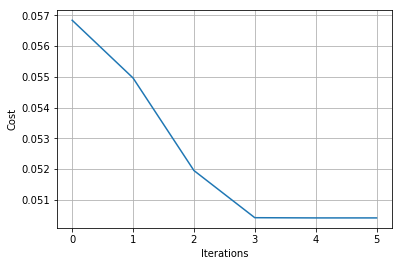

In [42]:
plt.plot(T.J)
plt.grid(1)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [43]:
NN.costFunctionPrime(x,y)

(array([[  3.87804307e-07,   0.00000000e+00,   0.00000000e+00],
        [  2.10743497e-06,   0.00000000e+00,   0.00000000e+00]]),
 array([[  4.03601550e-06],
        [  0.00000000e+00],
        [  0.00000000e+00]]))

In [44]:
NN.forward(x)

array([[ 0.75000381],
       [ 0.53599981],
       [ 1.07199962]])

In [45]:
y

array([[ 0.75],
       [ 0.82],
       [ 0.93]])

In [46]:
hoursSleep = np.linspace(0, 10, 100)
hoursStudy = np.linspace(0, 5, 100)
hoursSleepNorm = hoursSleep/10.
hoursStudyNorm = hoursStudy/5.
a, b  = np.meshgrid(hoursSleepNorm, hoursStudyNorm)
allInputs = np.zeros((a.size, 2))
allInputs[:, 0] = a.ravel()
allInputs[:, 1] = b.ravel()

In [47]:
allOutputs = NN.forward(allInputs)

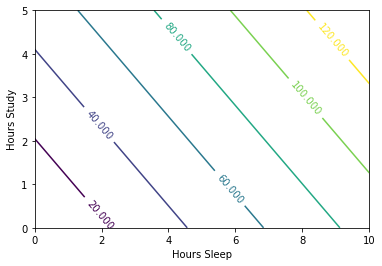

In [48]:
yy = np.dot(hoursStudy.reshape(100,1), np.ones((1,100)))
xx = np.dot(hoursSleep.reshape(100,1), np.ones((1,100))).T

CS = plt.contour(xx,yy,100*allOutputs.reshape(100, 100))
plt.clabel(CS, inline=1, fontsize=10)
plt.xlabel('Hours Sleep')
plt.ylabel('Hours Study')
plt.show()